In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("photometric-monitoring.xlsx")
df

,3FHL_Name,3FHL_CLASS,3FHL_RAJ2000,3FHL_DEJ2000,Assoc1_Name,z_for_MC,z_LL,z_quality_comment,Livetime,Extension_Flag,High_S/N_spectra,Comment,Action,Spectro-Observations,Imaging-Observations
0,3FHL J0022.1-1855,bll,5.525983,-18.917013,1RXS J002209.2-185,0.774,True,NaN,20.0,N,Y?,z>0.774 Keck Shaw et al. 13 spectrum not in ar...,Spectroscopy in photometric minimum,NaN,NaN
1,3FHL J0033.5-1921,bll,8.392931,-19.357483,KUV 00311-1938,0.506,True,Clear MgII absorber,1.0,N,Y,Pita et al. 14,Spectroscopy in photometric minimum,NaN,NaN
2,3FHL J0035.2+1514,bll,8.817282,15.243119,RX J0035.2+1515,0.300,False,NaN,13.0,N,Y,"Paiano et al. 17, SDSS",Spectroscopy in photometric minimum,NaN,NaN
3,3FHL J0035.9+5950,bll,8.978161,59.835045,1ES 0033+595,0.300,False,Tentative redshift ?,1.0,NP,Y,"z=0.467 Tentative Paiano et al. 17, Nilsson et...",Spectroscopy in photometric minimum,NaN,NaN
4,3FHL J0120.4-2701,bll,20.115040,-27.027128,PKS 0118-272,0.558,True,NaN,4.0,N,Y,"Deep UVES spectra, HST imaging",Spectroscopy in photometric minimum,NaN,NaN
5,3FHL J0136.5+3906,bll,24.139187,39.101215,B3 0133+388,0.300,False,NaN,1.0,NP,Y,"Several high S/N spectra, no result",Spectroscopy in photometric minimum,NaN,NaN
6,3FHL J0211.2+1051,BLL,32.814346,10.858768,MG1 J021114+1051,0.300,False,NaN,4.0,YP,Y,Extended Meisner & Romani 2010,Spectroscopy in photometric minimum,NaN,NaN
7,3FHL J0222.6+4302,BLL,35.666264,43.034084,3C 66A,0.334,True,HST Ly alpha abs.+cluster,1.0,NP,Y,"Cluster z=0.34, Torres-Zafra et al. 18, Stadni...",Spectroscopy in photometric minimum,NaN,NaN
8,3FHL J0334.2-3726,bll,53.569492,-37.444336,PMN J0334-3725,0.300,False,NaN,16.0,n,Y,Shaw et al. 13 VLT spectrum,Spectroscopy in photometric minimum,NaN,NaN
9,3FHL J0449.4-4350,bll,72.361565,-43.833763,PKS 0447-439,0.300,False,Possible cluster,1.0,n,Y,"Cluster z=0.343, Muriel et al. 15",Spectroscopy in photometric minimum,NaN,NaN


In [3]:
from astropy.io import fits
fgl = fits.open("gll_psc_v27.fit")
fgl.info()

Filename: gll_psc_v27.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  LAT_Point_Source_Catalog    1 BinTableHDU    435   5788R x 74C   [18A, I, E, E, E, E, E, E, E, E, E, E, I, 18A, E, E, E, E, E, E, 17A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 7E, 14E, 7E, 7E, E, E, E, E, E, E, D, E, 10E, 20E, 10E, 18A, 18A, 18A, 18A, 18A, A, 26A, 5A, 5A, 28A, 26A, E, E, D, D, E, I]   
  2  ExtendedSources    1 BinTableHDU     74   75R x 11C   [17A, E, E, E, E, 11A, E, E, E, 11A, 24A]   
  3  ROIs          1 BinTableHDU    121   1519R x 12C   [I, E, E, E, E, E, E, E, E, E, E, E]   
  4  Components    1 BinTableHDU     53   15R x 9C   [E, E, I, I, E, E, E, I, I]   
  5  EnergyBounds    1 BinTableHDU     75   19R x 10C   [E, E, E, I, I, E, E, E, I, I]   
  6  Hist_Start    1 BinTableHDU     42   11R x 1C   [D]   
  7  GTI           1 BinTableHDU     39   57987R x 2C   [D, D]   


In [4]:
fgl[7].columns

ColDefs(
    name = 'START'; format = 'D'; unit = 's'
    name = 'STOP'; format = 'D'; unit = 's'
)

In [5]:
fgl[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  752 /   length of dimension 1                        
NAXIS2  =                 5788 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   74 /   number of table fields                       
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
COMMENT                                                                         
COMMENT  *** Column names **

In [6]:
fgl[1].columns

ColDefs(
    name = 'Source_Name'; format = '18A'
    name = 'DataRelease'; format = 'I'; null = 16959
    name = 'RAJ2000'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'DEJ2000'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'GLON'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'GLAT'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Conf_68_SemiMajor'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Conf_68_SemiMinor'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Conf_68_PosAng'; format = 'E'; unit = 'deg'; disp = 'F8.3'
    name = 'Conf_95_SemiMajor'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Conf_95_SemiMinor'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Conf_95_PosAng'; format = 'E'; unit = 'deg'; disp = 'F8.3'
    name = 'ROI_num'; format = 'I'; null = 16959
    name = 'Extended_Source_Name'; format = '18A'
    name = 'Signif_Avg'; format = 'E'; disp = 'F8.3'
    name = 'Pivot_Energy'; format = 'E'; unit = 'MeV'; di

In [7]:
names_fgl = fgl[1].data["Source_Name"]
assoc_fhl = fgl[1].data["ASSOC_FHL"]
flux = fgl[1].data["Flux_Peak"]
flags = fgl[1].data["Flags"]
source_type = fgl[1].data["ASSOC1"]

In [8]:
#number of bllac
len(fgl[1].data["CLASS1"][fgl[1].data["CLASS1"] == 'bll'])

1286

(array([372.,  47.,  22.,   6.,   3.,   3.,   1.,   0.,   0.,   1.]),
 array([1.29411337e-09, 3.68368021e-08, 7.23794855e-08, 1.07922176e-07,
        1.43464860e-07, 1.79007557e-07, 2.14550241e-07, 2.50092938e-07,
        2.85635622e-07, 3.21178305e-07, 3.56720989e-07], dtype=float32),
 <a list of 10 Patch objects>)

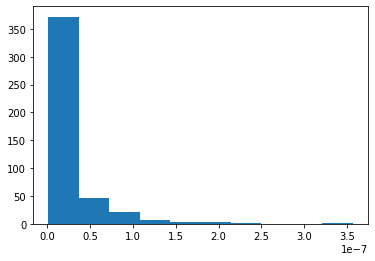

In [9]:
plt.hist(fgl[1].data["Flux_Peak"][fgl[1].data["CLASS1"] == 'bll'])

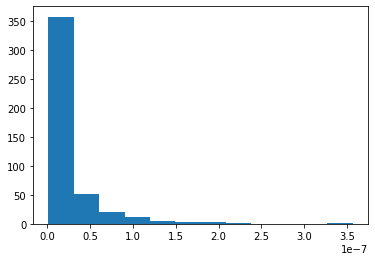

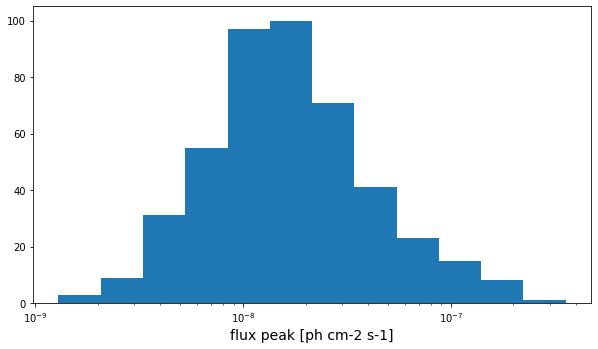

In [10]:
x = fgl[1].data["Flux_Peak"][fgl[1].data["CLASS1"] == 'bll']
x = pd.Series(x)

# histogram on linear scale
#plt.subplot(211)
hist, bins, _ = plt.hist(x, bins=12)
plt.figure(figsize=(10,12))
# histogram on log scale. 
# Use non-equal bin sizes, such that they look equal on log scale.
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.subplot(211)
plt.hist(x, bins=logbins)
plt.xscale('log')
plt.xlabel("flux peak [ph cm-2 s-1]", fontsize=14)
plt.show()

In [11]:
indexs = []
for name in df["3FHL_Name"]:
    index = np.where(name == assoc_fhl)[0][0]
    indexs.append(index)

In [12]:
names = names_fgl[indexs]
names

chararray(['4FGL J0022.1-1854', '4FGL J0033.5-1921', '4FGL J0035.2+1514',
           '4FGL J0035.9+5950', '4FGL J0120.4-2701', '4FGL J0136.5+3906',
           '4FGL J0211.2+1051', '4FGL J0222.6+4302', '4FGL J0334.2-3725',
           '4FGL J0449.4-4350', '4FGL J0521.7+2112', '4FGL J0650.7+2503',
           '4FGL J0700.5-6610', '4FGL J0718.6-4319', '4FGL J0811.0-7529',
           '4FGL J0816.4-1311', '4FGL J0953.0-0840', '4FGL J1022.7-0112',
           '4FGL J1023.8-4335', '4FGL J1059.2-1134', '4FGL J1120.8+4212',
           '4FGL J1248.3+5820', '4FGL J1253.2+5301', '4FGL J1353.6-6640',
           '4FGL J1418.4-0233', '4FGL J1540.1+8155', '4FGL J1555.7+1111',
           '4FGL J1610.7-6648', '4FGL J1725.0+1152', '4FGL J1754.2+3212',
           '4FGL J1903.2+5540', '4FGL J1921.8-1607', '4FGL J1942.7+1033',
           '4FGL J1959.7-4725', '4FGL J2139.4-4235', '4FGL J2243.9+2021',
           '4FGL J2357.4-1718', '4FGL J0507.9+6737', '4FGL J0509.4+0542',
           '4FGL J1427.0+2348'], dtype

In [13]:
flux[indexs]

array([          nan, 1.5644165e-08, 8.6887875e-09, 2.3127837e-08,
       2.5766763e-08, 2.2007802e-08, 1.0178729e-07, 1.9303810e-07,
       3.3894334e-08, 9.6196551e-08, 1.4155441e-07, 3.2606362e-08,
       6.0312743e-08,           nan, 1.8189388e-08, 2.3832527e-08,
       1.8813701e-08,           nan, 5.0448867e-09, 5.4806446e-08,
                 nan, 3.9659767e-08, 3.8905149e-08,           nan,
       1.7817330e-08,           nan, 5.8580476e-08, 1.0764406e-08,
       2.8266848e-08, 3.7742758e-08, 3.4827373e-08, 6.5614327e-09,
       3.2473050e-08,           nan, 1.0485722e-07, 2.9476100e-08,
                 nan, 9.5628172e-09, 1.9445193e-07, 8.5774431e-08],
      dtype=float32)

In [14]:
flags[indexs]

array([  0,   0,   0,   0,   0, 512,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0], dtype=int16)

(array([12., 10.,  3.,  0.,  2.,  2.,  0.,  1.,  0.,  2.]),
 array([5.0448867e-09, 2.3985590e-08, 4.2926295e-08, 6.1866999e-08,
        8.0807702e-08, 9.9748405e-08, 1.1868911e-07, 1.3762981e-07,
        1.5657052e-07, 1.7551122e-07, 1.9445193e-07], dtype=float32),
 <a list of 10 Patch objects>)

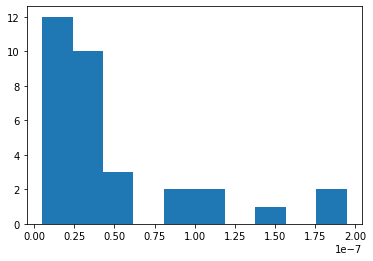

In [15]:
plt.hist(flux[indexs])

In [16]:
for a, b in zip(names, flux[indexs]):
    print(a, b)

4FGL J0022.1-1854 nan
4FGL J0033.5-1921 1.5644165e-08
4FGL J0035.2+1514 8.6887875e-09
4FGL J0035.9+5950 2.3127837e-08
4FGL J0120.4-2701 2.5766763e-08
4FGL J0136.5+3906 2.2007802e-08
4FGL J0211.2+1051 1.0178729e-07
4FGL J0222.6+4302 1.930381e-07
4FGL J0334.2-3725 3.3894334e-08
4FGL J0449.4-4350 9.619655e-08
4FGL J0521.7+2112 1.4155441e-07
4FGL J0650.7+2503 3.2606362e-08
4FGL J0700.5-6610 6.031274e-08
4FGL J0718.6-4319 nan
4FGL J0811.0-7529 1.8189388e-08
4FGL J0816.4-1311 2.3832527e-08
4FGL J0953.0-0840 1.88137e-08
4FGL J1022.7-0112 nan
4FGL J1023.8-4335 5.0448867e-09
4FGL J1059.2-1134 5.4806446e-08
4FGL J1120.8+4212 nan
4FGL J1248.3+5820 3.9659767e-08
4FGL J1253.2+5301 3.890515e-08
4FGL J1353.6-6640 nan
4FGL J1418.4-0233 1.781733e-08
4FGL J1540.1+8155 nan
4FGL J1555.7+1111 5.8580476e-08
4FGL J1610.7-6648 1.0764406e-08
4FGL J1725.0+1152 2.8266848e-08
4FGL J1754.2+3212 3.774276e-08
4FGL J1903.2+5540 3.4827373e-08
4FGL J1921.8-1607 6.5614327e-09
4FGL J1942.7+1033 3.247305e-08
4FGL J1959.7-

In [17]:
df.columns

Index(['3FHL_Name', '3FHL_CLASS', '3FHL_RAJ2000', '3FHL_DEJ2000',
       'Assoc1_Name', 'z_for_MC', 'z_LL', 'z_quality_comment', 'Livetime',
       'Extension_Flag', 'High_S/N_spectra', 'Comment', 'Action',
       'Spectro-Observations', 'Imaging-Observations'],
      dtype='object')

In [18]:
df["4FGL_Name"] = names
df["peak_flux"] = flux[indexs]

In [19]:
df

,3FHL_Name,3FHL_CLASS,3FHL_RAJ2000,3FHL_DEJ2000,Assoc1_Name,z_for_MC,z_LL,z_quality_comment,Livetime,Extension_Flag,High_S/N_spectra,Comment,Action,Spectro-Observations,Imaging-Observations,4FGL_Name,peak_flux
0,3FHL J0022.1-1855,bll,5.525983,-18.917013,1RXS J002209.2-185,0.774,True,NaN,20.0,N,Y?,z>0.774 Keck Shaw et al. 13 spectrum not in ar...,Spectroscopy in photometric minimum,NaN,NaN,4FGL J0022.1-1854,NaN
1,3FHL J0033.5-1921,bll,8.392931,-19.357483,KUV 00311-1938,0.506,True,Clear MgII absorber,1.0,N,Y,Pita et al. 14,Spectroscopy in photometric minimum,NaN,NaN,4FGL J0033.5-1921,1.564417e-08
2,3FHL J0035.2+1514,bll,8.817282,15.243119,RX J0035.2+1515,0.300,False,NaN,13.0,N,Y,"Paiano et al. 17, SDSS",Spectroscopy in photometric minimum,NaN,NaN,4FGL J0035.2+1514,8.688787e-09
3,3FHL J0035.9+5950,bll,8.978161,59.835045,1ES 0033+595,0.300,False,Tentative redshift ?,1.0,NP,Y,"z=0.467 Tentative Paiano et al. 17, Nilsson et...",Spectroscopy in photometric minimum,NaN,NaN,4FGL J0035.9+5950,2.312784e-08
4,3FHL J0120.4-2701,bll,20.115040,-27.027128,PKS 0118-272,0.558,True,NaN,4.0,N,Y,"Deep UVES spectra, HST imaging",Spectroscopy in photometric minimum,NaN,NaN,4FGL J0120.4-2701,2.576676e-08
5,3FHL J0136.5+3906,bll,24.139187,39.101215,B3 0133+388,0.300,False,NaN,1.0,NP,Y,"Several high S/N spectra, no result",Spectroscopy in photometric minimum,NaN,NaN,4FGL J0136.5+3906,2.200780e-08
6,3FHL J0211.2+1051,BLL,32.814346,10.858768,MG1 J021114+1051,0.300,False,NaN,4.0,YP,Y,Extended Meisner & Romani 2010,Spectroscopy in photometric minimum,NaN,NaN,4FGL J0211.2+1051,1.017873e-07
7,3FHL J0222.6+4302,BLL,35.666264,43.034084,3C 66A,0.334,True,HST Ly alpha abs.+cluster,1.0,NP,Y,"Cluster z=0.34, Torres-Zafra et al. 18, Stadni...",Spectroscopy in photometric minimum,NaN,NaN,4FGL J0222.6+4302,1.930381e-07
8,3FHL J0334.2-3726,bll,53.569492,-37.444336,PMN J0334-3725,0.300,False,NaN,16.0,n,Y,Shaw et al. 13 VLT spectrum,Spectroscopy in photometric minimum,NaN,NaN,4FGL J0334.2-3725,3.389433e-08
9,3FHL J0449.4-4350,bll,72.361565,-43.833763,PKS 0447-439,0.300,False,Possible cluster,1.0,n,Y,"Cluster z=0.343, Muriel et al. 15",Spectroscopy in photometric minimum,NaN,NaN,4FGL J0449.4-4350,9.619655e-08


## Data in ZTF

In [20]:
import astropy.units as u
from astropy import coordinates
from astropy.time import Time
from astropy.table import Table, Column
from astropy.coordinates import Distance
from astropy.cosmology import WMAP7

from IPython.display import HTML
from ipywidgets import Layout, Box, widgets

In [21]:
from alerce.core import Alerce
client = Alerce()

In [22]:
query_results = []

for i in range(len(df["3FHL_DEJ2000"])):
    ra = df["3FHL_RAJ2000"][i]
    dec = df["3FHL_DEJ2000"][i]
    query_results.append(client.query_objects(ra=ra, dec=dec , radius=15))

In [23]:
def plotLC(oid, LC_det, A=None, redshift=None):
    
    fig, ax = plt.subplots(figsize = (14, 8))
    labels = {1: 'g', 2: 'r'}
    colors = {1: '#56E03A', 2: '#D42F4B'}
    markers = {1: 'o', 2: 's'}
    
    # distmod: distance modulus, reftime: reference time
    if redshift is not None:
        distmod = float(Distance(z=redshift, cosmology=WMAP7).distmod / u.mag)
        reftime = LC_det.mjd.min()
    else:
        distmod = 0
        reftime = 0
        redshift = 0
        
    # loop the passbands
    for fid in [1, 2]:
        
        # galactic extinction in the given band
        if A is not None:
            A_fid = A[labels[fid]]
        else:
            A_fid = 0

        # plot detections if available
        mask = LC_det.fid == fid
        if np.sum(mask) > 0:
            
            # change time to restframe days if redshift is not zero
            times = (LC_det[mask].mjd - reftime) / (1. + redshift)
            
            # note that the detections index is candid and that we are plotting the psf corrected magnitudes
            if A_fid != 0:
                # plot attenuated light curve with small alpha
                ax.errorbar(times, LC_det[mask].magpsf_corr - distmod, 
                    yerr = LC_det[mask].sigmapsf_corr_ext, c = colors[fid], fmt=markers[fid], label = labels[fid], alpha=0.1)
                # show dust and distance attenuation corrected light curve
                ax.errorbar(times, LC_det[mask].magpsf_corr - A_fid - distmod, 
                    yerr = LC_det[mask].sigmapsf_corr_ext, c = colors[fid], fmt=markers[fid], label = "%s (ext. corr.)" % labels[fid])
            else:
                # correct only for redshift
                ax.errorbar(times, LC_det[mask].magpsf_corr - distmod, 
                    yerr = LC_det[mask].sigmapsf_corr_ext - A_fid, c = colors[fid], fmt=markers[fid], label = labels[fid])
        
            
    # labels
    if A is not None and redshift != 0:
        ax.set_title("%s ($A_g=%.3f, A_r=%.3f$, z=%.4f)" % (oid, A["g"], A["r"], redshift))
    elif redshift != 0:
        ax.set_title("%s (z=%.4f)" % (oid, redshift))
    elif A is not None:
        ax.set_title("%s ($A_g=%.3f, A_r=%.3f$)" % (oid, A["g"], A["r"]))
    else:
        ax.set_title(oid)
        
    if redshift == 0:
        ax.set_xlabel("MJD")
        ax.set_ylabel("Apparent magnitude")
    else:
        ax.set_xlabel("Restframe time [days]")
        ax.set_ylabel("Absolute magnitude (no K-corr.)")
    ax.legend()
    ax.set_ylim(ax.get_ylim()[::-1])

In [24]:
def getLCdata(oid, doLC=False, doext=False, dostamp=False, doNED=False, doredshift=False):

    results = {"oid": oid}
    
    # query basic stats
    LC_stats = client.query_object(oid, format='pandas')
    results["stats"] = LC_stats
    
    # query detections
    LC_det = client.query_detections(oid, format='pandas')
    results["lc_det"] = LC_det
    
    # object coordinates
    co = coordinates.SkyCoord(ra=LC_stats.meanra[0], dec=LC_stats.meandec[0], unit=(u.deg, u.deg), frame='fk5')
    
    # get galactic extinction
    if doext:
        # Galactic extinction (use SFD = D.J. Schlegel, D.P. Finkbeiner, & M. Davis (1998, ApJ, 500, 525))
        table = IrsaDust.get_extinction_table(co)
        A = {"g": float(table[table["Filter_name"] == "SDSS g"]["A_SFD"]), "r": float(table[table["Filter_name"] == "SDSS r"]["A_SFD"])}
        results["attenuation"] = A

    # plot the LC
    if doLC:
        if doext:
            plotLC(oid, LC_det, A)
        else:
            plotLC(oid, LC_det)
            
    # find NED galaxies
    if doNED:
        Ned_table = Ned.query_region(co, radius=2.0 * u.arcsec, equinox='J2000.0')
        display(Ned_table)
        results["ned_table"] = Ned_table
        
        # save closest redshift if any
        df_ned = Ned_table.to_pandas()
        mask=df_ned.Redshift.notna()
        if mask.sum() > 0:
            results["redshift"] = df_ned.loc[df_ned.loc[mask].Separation.idxmin()].Redshift
            print("Redshift found: %s" % results["redshift"])
            
    # plot absolute value (without K-corrections)
    if doredshift:
        if type(doredshift) == float and doredshift > 0:
            results["redshift"] = doredshift
        if "redshift" in results.keys():
            if doext:
                plotLC(oid, LC_det, A, results["redshift"])
            else:
                plotLC(oid, LC_det, results["redshift"])            
    
    
    # show link
    display(HTML("<a href='http://alerce.online/object/%s' target=\"_blank\"> %s <a>" % (oid, oid)))
    
    # show the first image stamp
    if dostamp:
        candid = results["lc_det"].loc[results["lc_det"].has_stamp].candid.min()
        stamps = client.get_stamps(oid, candid)
        science, ref, difference = stamps[0].data, stamps[1].data, stamps[2].data
        fig, ax = plt.subplots(ncols=3, figsize=(12, 6))
        for idx, im in enumerate([np.log(science), np.log(ref), difference]):
            ax[idx].imshow(im, cmap='viridis') # Log scale for visualization
            ax[idx].axes.get_xaxis().set_visible(False)
            ax[idx].axes.get_yaxis().set_visible(False)
        ax[0].set_title("oid: %s, candid: %s (science, reference and difference)" % (oid, candid), loc='left')
        fig.subplots_adjust(wspace = 0, hspace = 0)
        
    # return data
    return results

3FHL J0022.1-1855  no results
3FHL J0033.5-1921 / KUV 00311-1938 results: 
0    ZTF18abtftkf
Name: oid, dtype: object


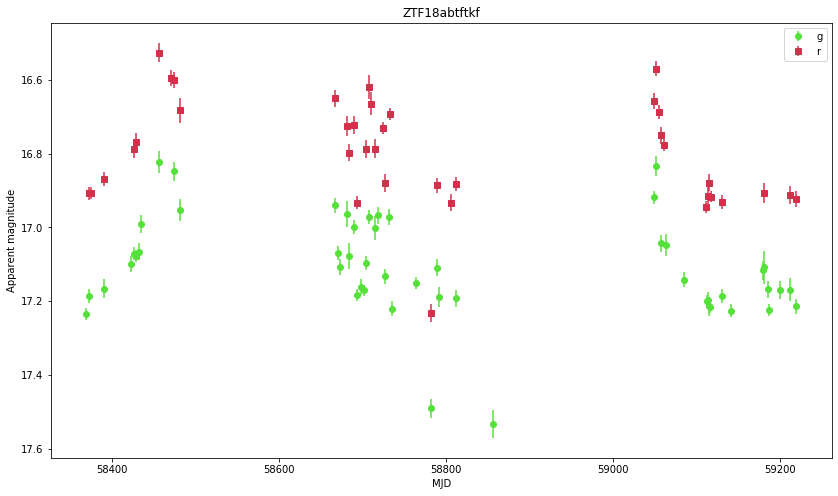

3FHL J0035.2+1514  no results
3FHL J0035.9+5950  no results
3FHL J0120.4-2701  no results
3FHL J0136.5+3906 / B3 0133+388 results: 
0    ZTF20abjmqnm
1    ZTF18achbdgm
Name: oid, dtype: object


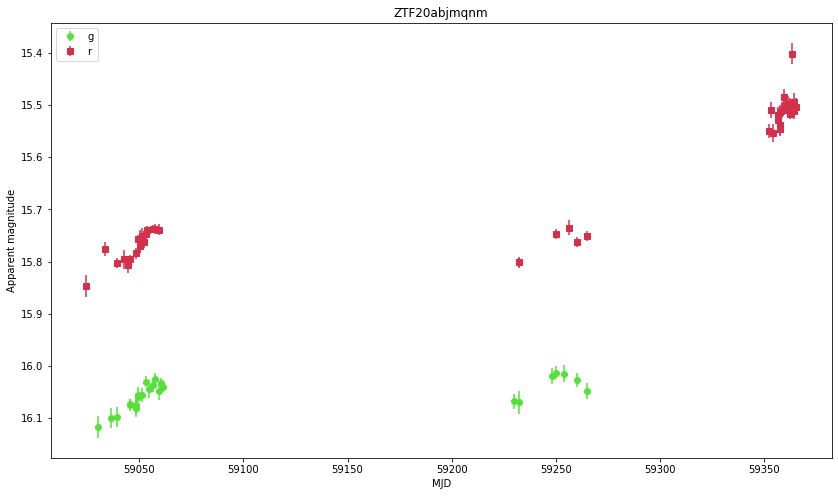

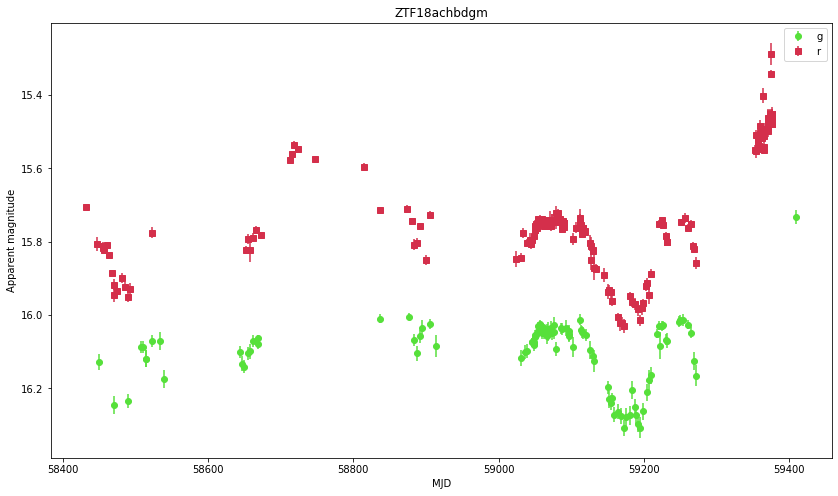

3FHL J0211.2+1051  no results
3FHL J0222.6+4302 / 3C 66A results: 
0    ZTF18aabezmq
Name: oid, dtype: object


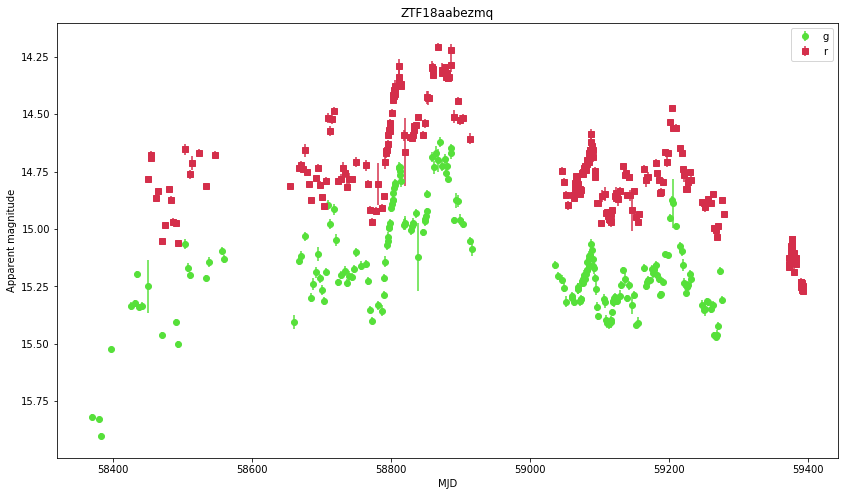

3FHL J0334.2-3726  no results
3FHL J0449.4-4350  no results
3FHL J0521.7+2112 / TXS 0518+211 results: 
0    ZTF20aafanrl
1    ZTF17aacgwpq
Name: oid, dtype: object


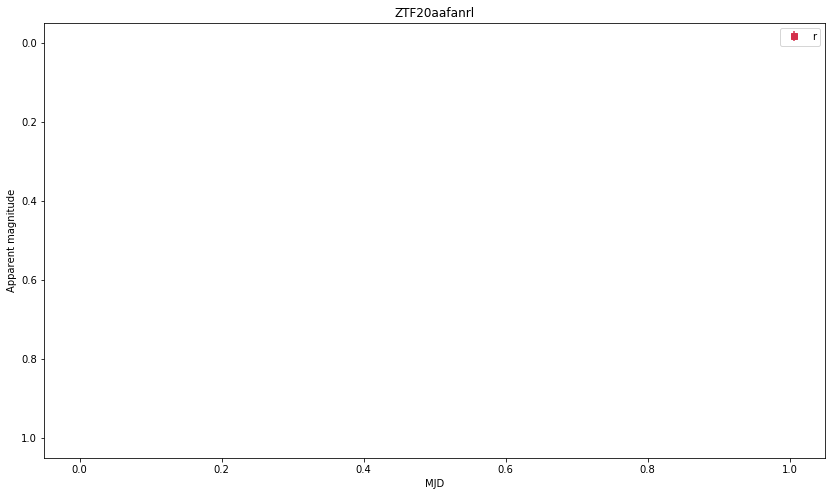

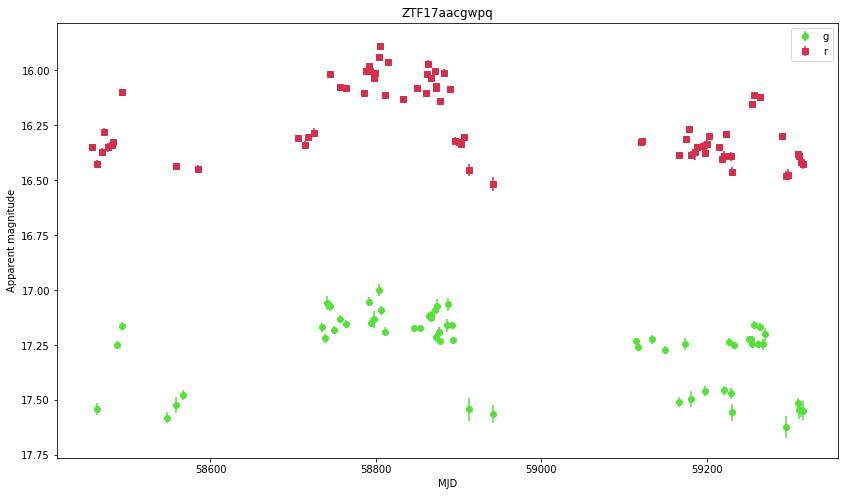

3FHL J0650.7+2503 / 1ES 0647+250 results: 
0    ZTF19abzmeot
1    ZTF21aagfgkl
Name: oid, dtype: object


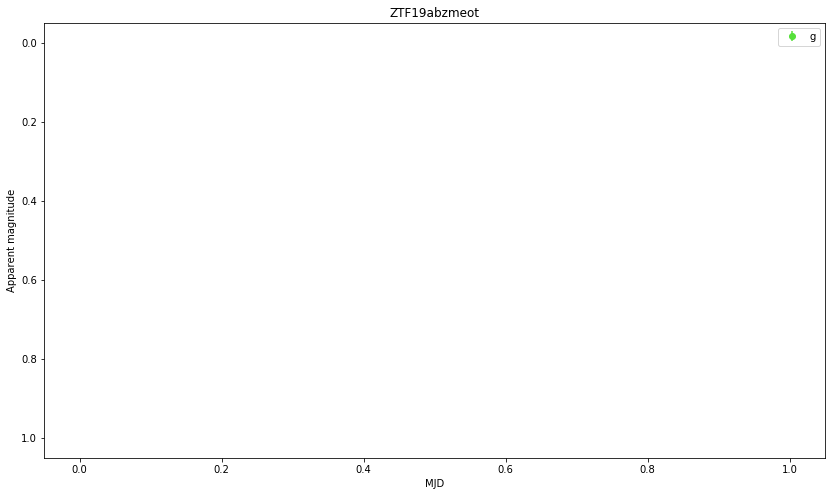

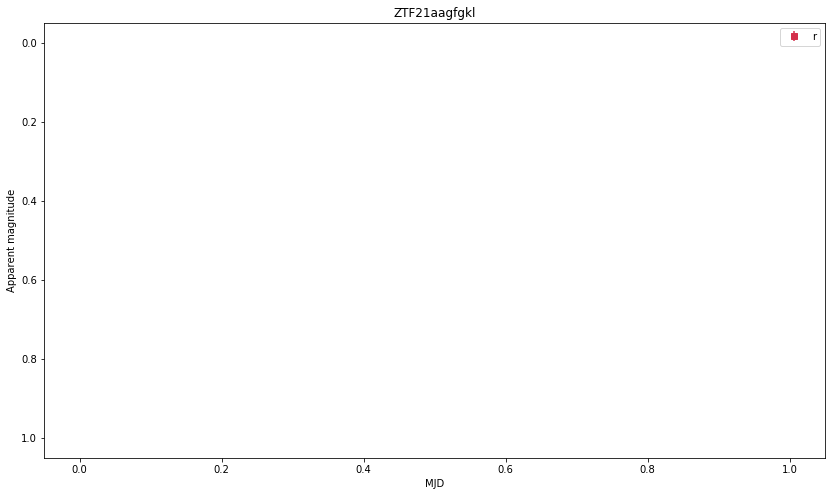

3FHL J0700.5-6611  no results
3FHL J0718.6-4319  no results
3FHL J0811.0-7529  no results
3FHL J0816.4-1311  no results
3FHL J0953.0-0840  no results
3FHL J1022.7-0113 / RX J1022.7-0112 results: 
0    ZTF19aaoxfhu
Name: oid, dtype: object


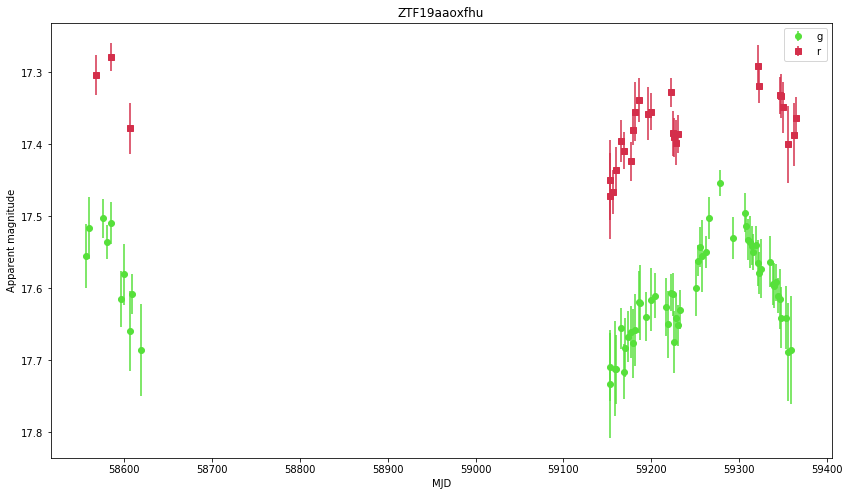

3FHL J1023.8-4335  no results
3FHL J1059.1-1134  no results
3FHL J1120.8+4212 / RBS 0970 results: 
0    ZTF20aajbuuc
1    ZTF18aaifwpa
2    ZTF18acdvuby
3    ZTF18aahfflo
Name: oid, dtype: object


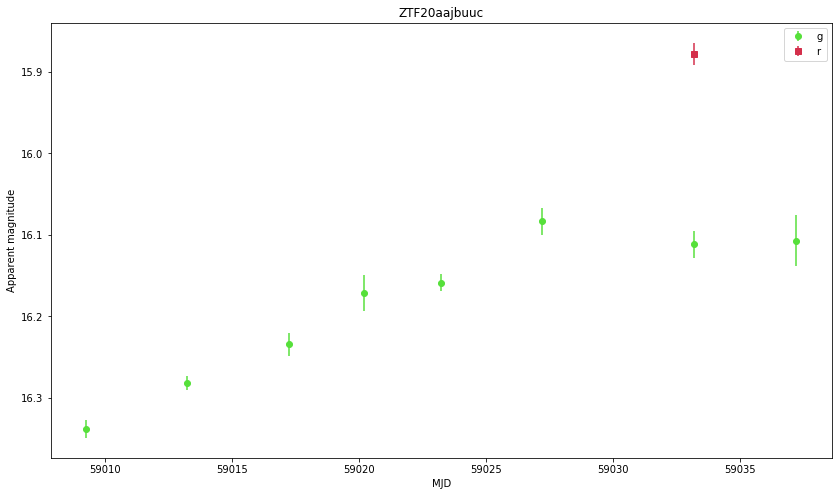

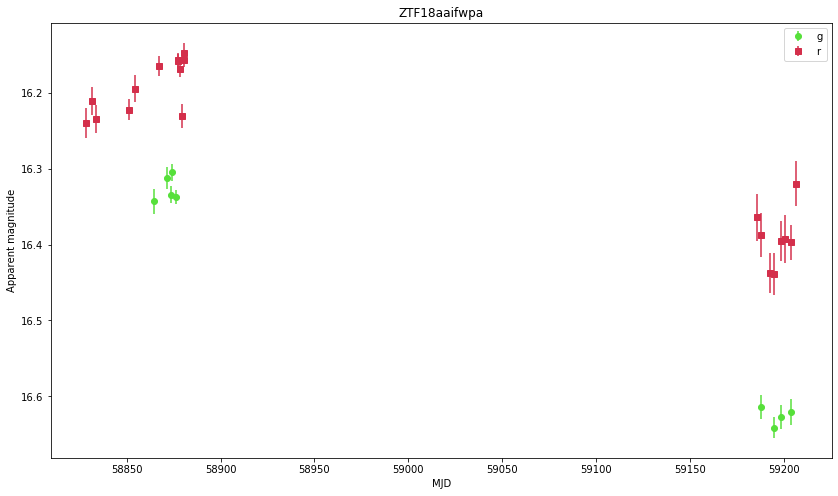

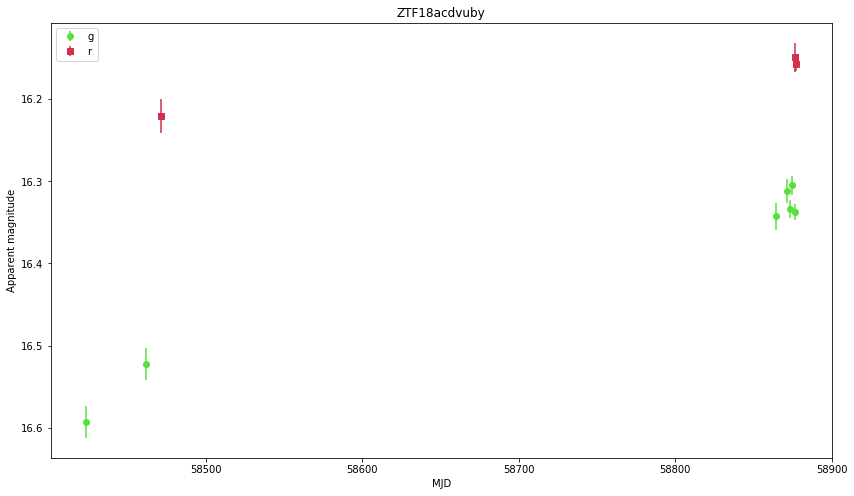

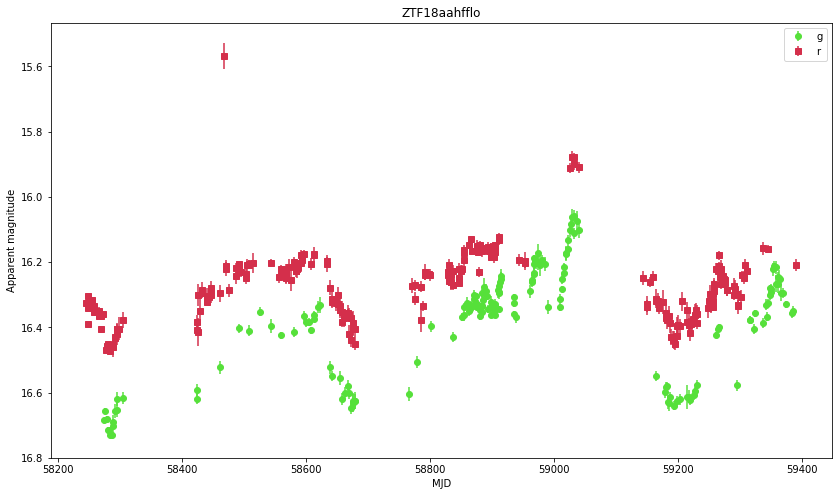

3FHL J1248.3+5820 / PG 1246+586 results: 
0    ZTF18aaaownr
1    ZTF19aaklsmy
Name: oid, dtype: object


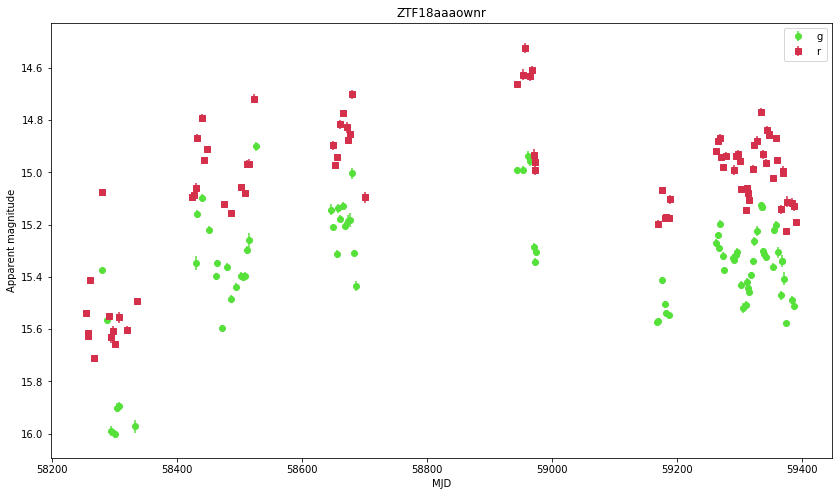

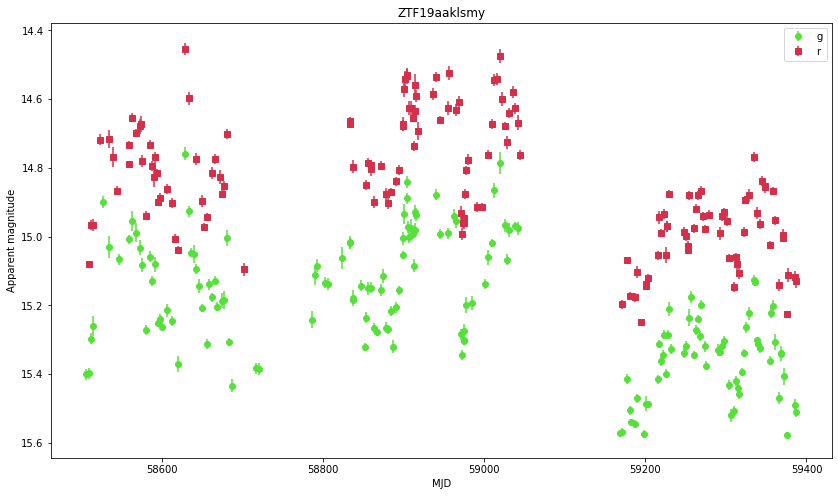

3FHL J1253.1+5300  no results
3FHL J1353.6-6640  no results
3FHL J1418.4-0233  no results
3FHL J1540.1+8154  no results
3FHL J1555.7+1111 / PG 1553+113 results: 
0    ZTF20aakzktc
1    ZTF18aaylblx
Name: oid, dtype: object


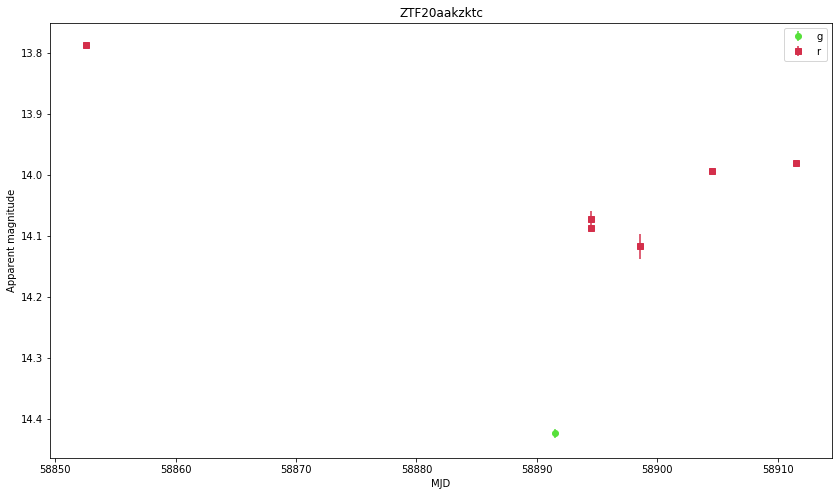

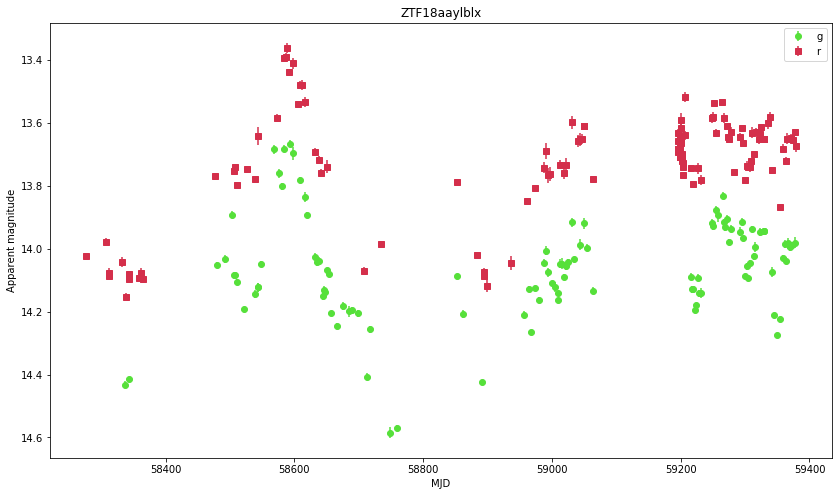

3FHL J1610.6-6649  no results
3FHL J1725.0+1152  no results
3FHL J1754.1+3212 / RX J1754.1+3212 results: 
0    ZTF18aakyttg
Name: oid, dtype: object


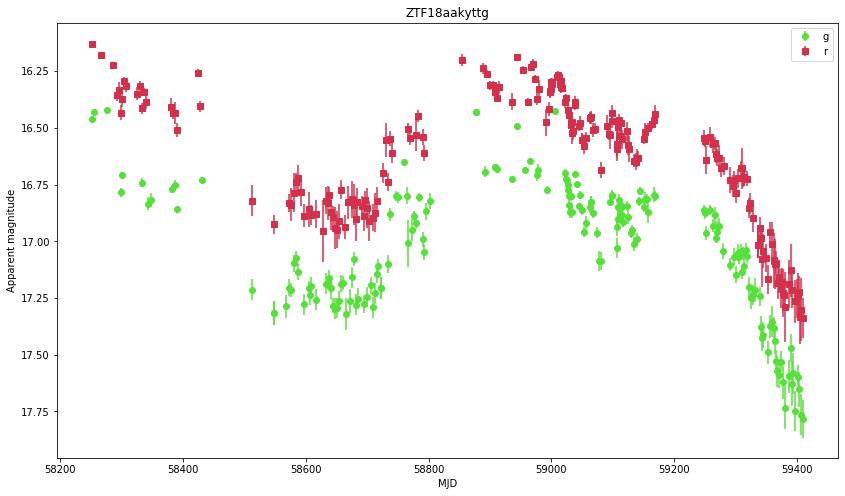

3FHL J1903.2+5540 / TXS 1902+556 results: 
0    ZTF19aanvgnw
Name: oid, dtype: object


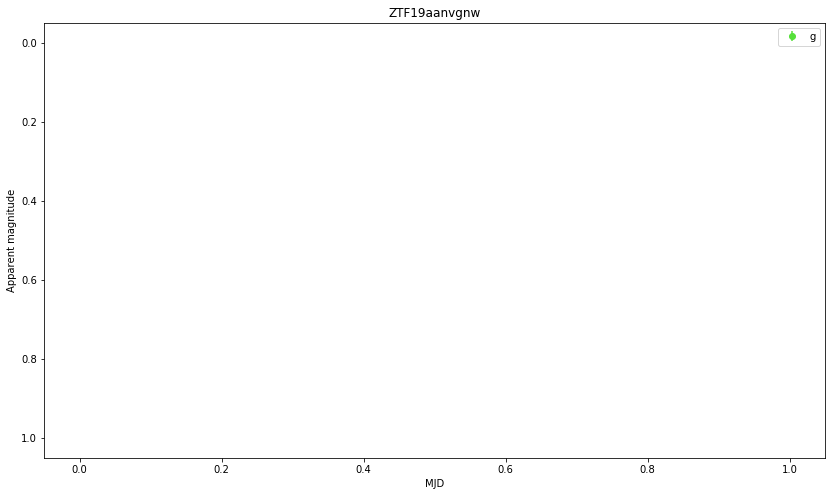

3FHL J1921.8-1607 / PMN J1921-1607 results: 
0    ZTF19aatuwxl
Name: oid, dtype: object


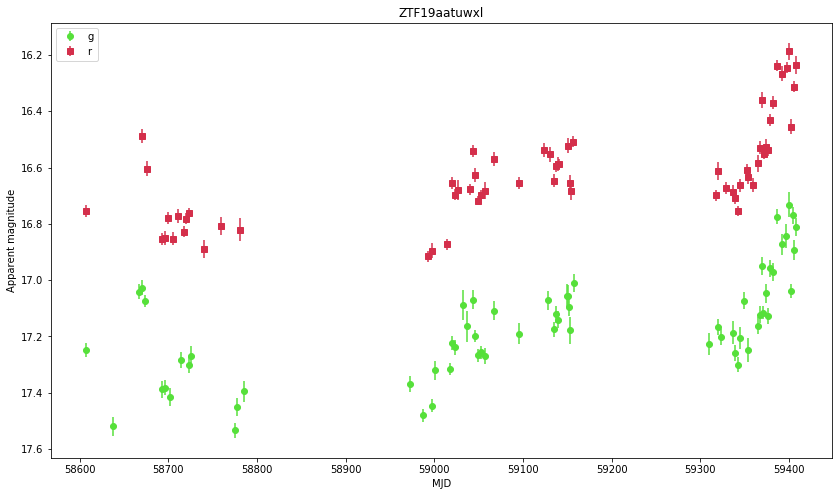

3FHL J1942.7+1033 / 1RXS J194246.3+103 results: 
0    ZTF18acbwlfu
Name: oid, dtype: object


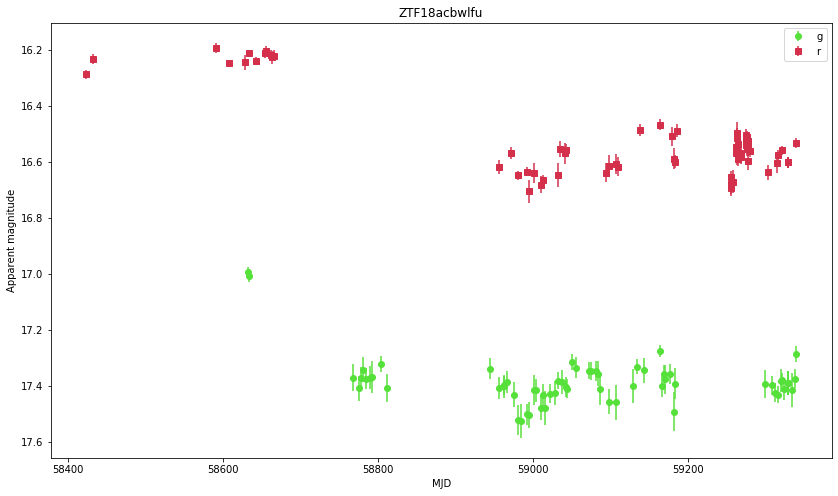

3FHL J1959.7-4725  no results
3FHL J2139.4-4234  no results
3FHL J2243.9+2020  no results
3FHL J2357.4-1717  no results
3FHL J0508.0+6737  no results
3FHL J0509.4+0542  no results
3FHL J1427.0+2348  no results


In [25]:
detected_ztf = []
for i in range(len(df["3FHL_Name"])):
    result = query_results[i]
    try:
        aux = result.oid
        detected_ztf.append(True)
        print(df["3FHL_Name"][i] + " / " + df["Assoc1_Name"][i], "results: ")
        print(result.oid)
        for oid in query_results[i].oid.unique():
            getLCdata(oid, doLC=True);
            plt.show()
    except:
        detected_ztf.append(False)
        print(df["3FHL_Name"][i], " no results")

In [26]:
len(detected_ztf), len(names)

(40, 40)

In [27]:
count = 0
for a in detected_ztf:
    if a:
        count += 1

In [28]:
count

13

In [29]:
fluxes = flux[indexs]

In [30]:
fluxes[detected_ztf]

array([1.5644165e-08, 2.2007802e-08, 1.9303810e-07, 1.4155441e-07,
       3.2606362e-08,           nan,           nan, 3.9659767e-08,
       5.8580476e-08, 3.7742758e-08, 3.4827373e-08, 6.5614327e-09,
       3.2473050e-08], dtype=float32)

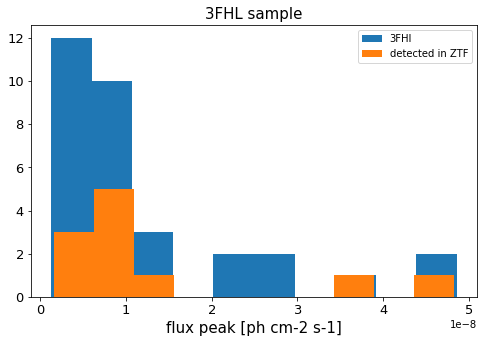

In [52]:
plt.figure(figsize=(8,5))

plt.hist(fluxes/4, label="3FHl")
plt.hist(fluxes[detected_ztf]/4, label ="detected in ZTF")
plt.title("3FHL sample", fontsize=15)
plt.xlabel("flux peak [ph cm-2 s-1]", fontsize=15)
plt.xticks(fontsize= 13)
plt.yticks(fontsize= 13)
#plt.xscale("Log")
plt.legend()

## All Bl lacs in 4fgl

In [32]:
bllac = fgl[1].data[fgl[1].data["CLASS1"] == 'bll']

In [33]:
query_bllac = []

for i in range(len(fgl[1].data[fgl[1].data["CLASS1"] == 'bll']["Class1"])):
    ra = bllac["RAJ2000"][i]
    dec = bllac["DEJ2000"][i]
    query_bllac.append(client.query_objects(ra=ra, dec=dec , radius=15))

In [34]:
query_bllac[38]

,oid,ndethist,ncovhist,mjdstarthist,mjdendhist,corrected,stellar,ndet,g_r_max,g_r_max_corr,...,lastmjd,deltajd,meanra,meandec,sigmara,sigmadec,class,classifier,probability,step_id_corr
0,ZTF18abtftkf,131,393,58333.418912,59219.17169,True,True,91,0.350603,0.296767,...,59219.17169,849.84412,8.393234,-19.359215,0.000087,0.00008,Blazar,lc_classifier,0.682132,corr_bulk_0.0.1


In [35]:
ztfbllac = []
for i in range(len(fgl[1].data[fgl[1].data["CLASS1"] == 'bll']["Class1"])):
    result = query_bllac[i]
    try:
        aux = result.oid
        ztfbllac.append(True)
        print(bllac["Source_Name"][i])
        print(result.oid)
        #for oid in query_results[i].oid.unique():
         #   getLCdata(oid, doLC=True);
          #  plt.show()
    except:
        ztfbllac.append(False)
        print(bllac["Source_Name"][i], " no results")

4FGL J0001.2-0747  no results
4FGL J0003.2+2207  no results
4FGL J0003.9-1149  no results
4FGL J0004.0+0840  no results
4FGL J0006.3-0620  no results
4FGL J0006.4+0135  no results
4FGL J0008.0+4711  no results
4FGL J0008.4-2339  no results
4FGL J0009.1+0628  no results
4FGL J0009.3+5030
0    ZTF18abtworo
Name: oid, dtype: object
4FGL J0009.8-4317  no results
4FGL J0013.1-3955  no results
4FGL J0013.9-1854  no results
4FGL J0014.1+1910
0    ZTF20acsqych
Name: oid, dtype: object
4FGL J0014.1-5022  no results
4FGL J0014.2+0854  no results
4FGL J0014.7+5801  no results
4FGL J0015.2+3537
0    ZTF19abpffmn
Name: oid, dtype: object
4FGL J0015.6+5551  no results
4FGL J0015.9+2440  no results
4FGL J0017.8+1455
0    ZTF18abtdzce
Name: oid, dtype: object
4FGL J0018.4+2946  no results
4FGL J0019.3-8152  no results
4FGL J0019.6+2022  no results
4FGL J0021.5-2552  no results
4FGL J0021.6-0855  no results
4FGL J0021.9-5140  no results
4FGL J0022.0+0006  no results
4FGL J0022.1-1854  no results
4FGL J

4FGL J0610.1-1848
0    ZTF18acuxqde
Name: oid, dtype: object
4FGL J0611.6+2803  no results
4FGL J0612.8+4122  no results
4FGL J0615.3-3117  no results
4FGL J0616.1-1732  no results
4FGL J0617.2+5701  no results
4FGL J0617.7-1715  no results
4FGL J0621.7-3411  no results
4FGL J0621.8+1746  no results
4FGL J0622.3-2605  no results
4FGL J0623.2+3044  no results
4FGL J0623.9-5259  no results
4FGL J0625.3+4439
0    ZTF18aadepeo
Name: oid, dtype: object
4FGL J0626.4-4259  no results
4FGL J0626.4-1712  no results
4FGL J0628.8-6250  no results
4FGL J0629.3-1959  no results
4FGL J0630.9-2406  no results
4FGL J0640.0-1253  no results
4FGL J0644.6+6039  no results
4FGL J0647.7-6058  no results
4FGL J0648.7+1516
0    ZTF18acgslnv
1    ZTF19aaeigmd
Name: oid, dtype: object
4FGL J0649.5-3139  no results
4FGL J0650.7+2503  no results
4FGL J0653.7+2815  no results
4FGL J0654.7+4246  no results
4FGL J0656.3+4235  no results
4FGL J0656.3-2404  no results
4FGL J0700.2+1304  no results
4FGL J0700.5-6610  

Name: oid, dtype: object
4FGL J1254.9-4426  no results
4FGL J1256.2-1146  no results
4FGL J1257.2+3646  no results
4FGL J1257.6+2413  no results
4FGL J1258.3+6121  no results
4FGL J1258.7-0452  no results
4FGL J1259.1-2311  no results
4FGL J1259.7-3223  no results
4FGL J1259.8-3749  no results
4FGL J1300.0+1753  no results
4FGL J1301.5+4413  no results
4FGL J1301.6+4056  no results
4FGL J1302.7+4750  no results
4FGL J1302.8+5748  no results
4FGL J1303.0+2434  no results
4FGL J1304.0+3704  no results
4FGL J1304.2-2412  no results
4FGL J1304.3-4353  no results
4FGL J1305.6+7853
0    ZTF19aakoitp
Name: oid, dtype: object
4FGL J1305.9+3858  no results
4FGL J1307.6-4259  no results
4FGL J1309.4+4305  no results
4FGL J1309.7+1153  no results
4FGL J1310.2-1158  no results
4FGL J1310.6+2449  no results
4FGL J1311.0+0034
0    ZTF21abictnj
Name: oid, dtype: object
4FGL J1311.8+3954  no results
4FGL J1312.4-2156  no results
4FGL J1312.8-2350
0    ZTF20aawdwot
Name: oid, dtype: object
4FGL J1314.7

Name: oid, dtype: object
4FGL J1830.0-5225  no results
4FGL J1830.0+1324  no results
4FGL J1831.9+3820  no results
4FGL J1832.6-5658  no results
4FGL J1834.7-5858  no results
4FGL J1835.5+1349  no results
4FGL J1836.4+3137  no results
4FGL J1838.0-5959  no results
4FGL J1838.4-6023  no results
4FGL J1838.8+4802  no results
4FGL J1841.3+2909  no results
4FGL J1841.8+3218  no results
4FGL J1842.4-5840  no results
4FGL J1844.4+1547  no results
4FGL J1844.9+5709  no results
4FGL J1848.5+6537  no results
4FGL J1848.9+4247
0    ZTF18abdonot
Name: oid, dtype: object
4FGL J1849.4+2745  no results
4FGL J1849.4-4313  no results
4FGL J1850.5+2631  no results
4FGL J1853.8+6714
0    ZTF20acuayyp
1    ZTF18abhxyrg
Name: oid, dtype: object
4FGL J1854.6-6007  no results
4FGL J1858.3+4321  no results
4FGL J1903.2+5540
0    ZTF19aanvgnw
Name: oid, dtype: object
4FGL J1904.1+3627  no results
4FGL J1911.4-1908  no results
4FGL J1913.9+4439  no results
4FGL J1917.7-1921  no results
4FGL J1918.2-4111  no re

In [36]:
len(fgl[1].data[fgl[1].data["CLASS1"] == 'bll']["Class1"])

1286

In [37]:
counterr = 0
for i in ztfbllac:
    if i:
        counterr += 1

In [38]:
counterr

136

In [39]:
ztfbllac

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 F

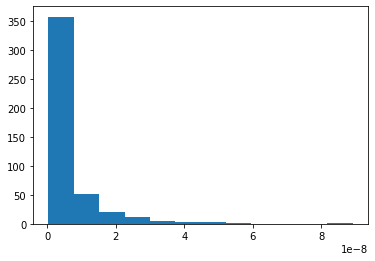

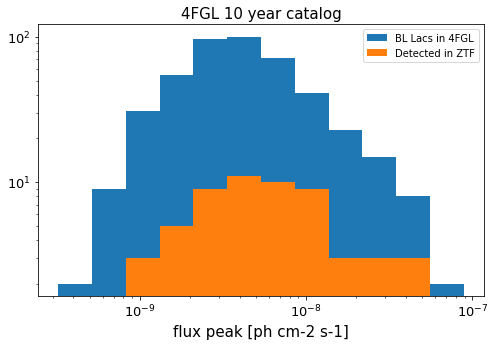

In [47]:

hist, bins, _ = plt.hist(bllac["Flux_Peak"]/4, bins=12)
plt.show()
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.figure(figsize=(8,5))
plt.hist(bllac["Flux_Peak"]/4, label="BL Lacs in 4FGL", bins=logbins)
plt.hist(bllac["Flux_Peak"][ztfbllac]/4, label="Detected in ZTF", bins=logbins)
#plt.hist(fluxes[detected_ztf], label ="detected in ZTF")
plt.xlabel("flux peak [ph cm-2 s-1]", fontsize=15)
plt.title("4FGL 10 year catalog", fontsize=15)
plt.legend()
plt.xscale('log')
plt.xticks(fontsize= 13)
plt.yticks(fontsize= 13)
plt.yscale('log')

In [41]:
names

chararray(['4FGL J0022.1-1854', '4FGL J0033.5-1921', '4FGL J0035.2+1514',
           '4FGL J0035.9+5950', '4FGL J0120.4-2701', '4FGL J0136.5+3906',
           '4FGL J0211.2+1051', '4FGL J0222.6+4302', '4FGL J0334.2-3725',
           '4FGL J0449.4-4350', '4FGL J0521.7+2112', '4FGL J0650.7+2503',
           '4FGL J0700.5-6610', '4FGL J0718.6-4319', '4FGL J0811.0-7529',
           '4FGL J0816.4-1311', '4FGL J0953.0-0840', '4FGL J1022.7-0112',
           '4FGL J1023.8-4335', '4FGL J1059.2-1134', '4FGL J1120.8+4212',
           '4FGL J1248.3+5820', '4FGL J1253.2+5301', '4FGL J1353.6-6640',
           '4FGL J1418.4-0233', '4FGL J1540.1+8155', '4FGL J1555.7+1111',
           '4FGL J1610.7-6648', '4FGL J1725.0+1152', '4FGL J1754.2+3212',
           '4FGL J1903.2+5540', '4FGL J1921.8-1607', '4FGL J1942.7+1033',
           '4FGL J1959.7-4725', '4FGL J2139.4-4235', '4FGL J2243.9+2021',
           '4FGL J2357.4-1718', '4FGL J0507.9+6737', '4FGL J0509.4+0542',
           '4FGL J1427.0+2348'], dtype